# Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import numpy as np
import seaborn as sns

# Reading data

In [2]:
data = pd.read_csv("train_data.csv")
print(data.head())

                                   uuid          VLF    VLF_PCT           LF  \
0  4a122afe-6e52-4ed0-840d-66155da95ba1  2259.833995  67.884986  1058.573968   
1  0848f722-52ec-420c-adb1-a1e90a2e2709  2430.367576  60.980572  1541.466293   
2  7814286a-f939-45a7-8620-82b339a7ad4b   989.800997  27.651929  2478.164707   
3  de843d67-0ed3-4dfe-af91-78923dc31810  2025.914557  57.014236  1464.561241   
4  ba117ec1-3de8-4da3-a315-4c7716589439  1576.443907  71.274370   619.624143   

      LF_PCT      LF_NU          HF    HF_PCT     HF_NU           TP  ...  \
0  31.799362  99.017120   10.507787  0.315652  0.982880  3328.915749  ...   
1  38.677070  99.122594   13.644635  0.342359  0.877406  3985.478504  ...   
2  69.232133  95.693128  111.535043  3.115939  4.306872  3579.500746  ...   
3  41.216368  95.883762   62.872820  1.769396  4.116238  3553.348618  ...   
4  28.014521  97.524479   15.728281  0.711109  2.475521  2211.796331  ...   

       KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_

## Exploratory Data Analysis

In [3]:
data.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [4]:
feature_columns = data.columns

label_columns = list(feature_columns)
print(label_columns)
print(len(label_columns))

['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']
37


In [5]:
data.shape

(5000, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [7]:
data.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2242.846274,64.618473,944.666618,33.756563,95.513467,39.787329,1.624964,4.486533,3227.300221,111.958521,...,0.564676,0.070378,5.114420e-07,-0.000448,0.018638,0.009758,0.009758,2.005098,0.564676,0.070378
std,1853.845285,16.858102,572.705322,16.121002,4.200091,46.887627,1.793648,4.200091,1957.986129,330.772146,...,1.738594,0.706996,1.662361e-04,0.000878,0.005468,0.003953,0.003953,0.378332,1.738594,0.706996
min,182.001656,19.492924,105.352082,2.218141,70.677164,0.063182,0.002234,0.013127,393.870306,2.410311,...,-1.851368,-2.130673,-1.049175e-03,-0.004361,0.008992,0.003645,0.003645,1.188950,-1.851368,-2.130673
25%,1009.686180,52.998781,547.027436,21.775991,93.560684,10.946137,0.347487,1.241594,1863.994785,14.529600,...,-0.347156,-0.340853,-7.130486e-05,-0.000911,0.014335,0.006999,0.006999,1.744527,-0.347156,-0.340853
50%,1705.183308,66.792593,779.619006,31.364370,96.583947,24.939947,1.023576,3.416053,2826.860362,28.273553,...,0.065799,-0.042454,1.639271e-06,-0.000297,0.017363,0.008766,0.008766,1.936696,0.065799,-0.042454
75%,2678.847972,77.328811,1199.089822,44.458585,98.758406,45.549542,2.276872,6.439316,4085.011726,79.541694,...,0.782407,0.342719,6.955046e-05,0.000161,0.021882,0.011538,0.011537,2.220642,0.782407,0.342719
max,12278.649761,97.703187,3211.424686,77.507972,99.986873,359.927420,12.533266,29.322836,13119.276456,7617.164272,...,16.367846,3.626919,9.518686e-04,0.002038,0.036017,0.026660,0.026660,3.676899,16.367846,3.626919


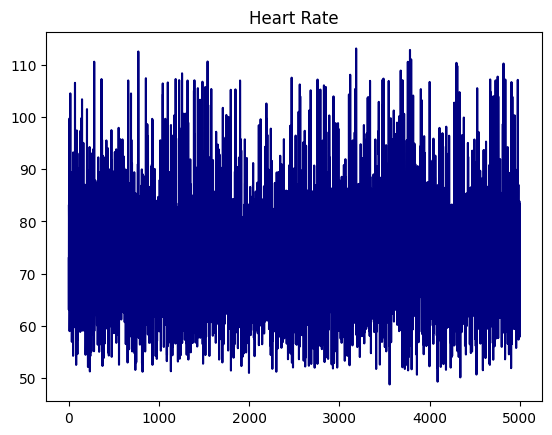

In [8]:
plt.plot(data['HR'], color='navy')
plt.title('Heart Rate')
plt.show()

C:\Users\shory\AppData\Local\Temp\ipykernel_37244\2195483896.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HR'], color='blue', bins=100, hist_kws={'alpha': 0.6}, kde=1)


<Axes: xlabel='HR', ylabel='Density'>

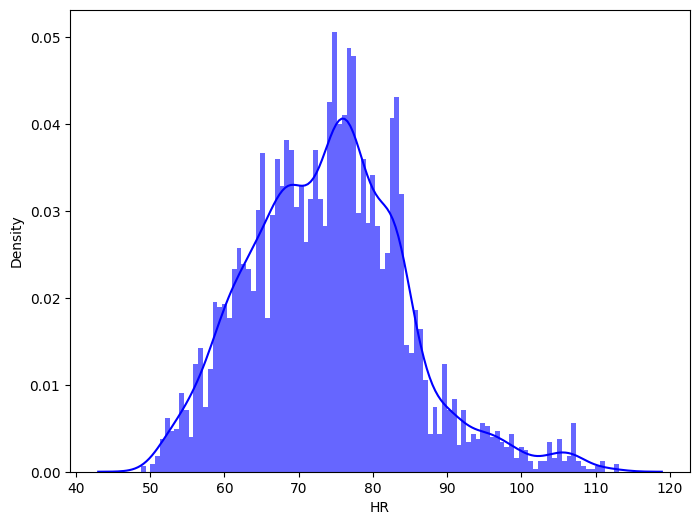

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(data['HR'], color='blue', bins=100, hist_kws={'alpha': 0.6}, kde=1)

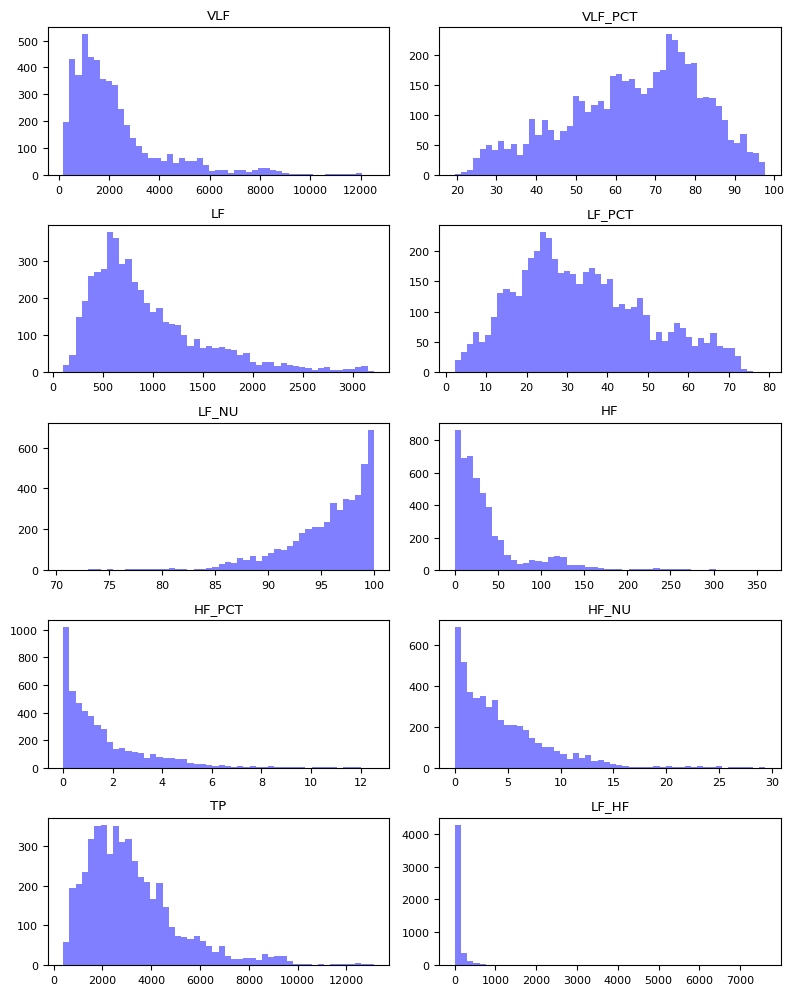

In [10]:
features_to_visualize = ['MEDIAN_RR', 'MEAN_RR', 'HF_PCT', 'HF_LF', 'LF_HF', 'HF_NU', 'LF_NU', 'HF', 'SDRR_RMSSD_REL_RR', 'SDSD_REL_RR']


feature_columns = data.columns[1:]


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()


for idx, ax in enumerate(axes):
    ax.figure
    numeric_values = pd.to_numeric(data[feature_columns[idx]], errors='coerce').dropna()

    if not numeric_values.empty:
        binwidth = (max(numeric_values) - min(numeric_values)) / 50
        ax.hist(numeric_values, bins=np.arange(min(numeric_values), max(numeric_values) + binwidth, binwidth),
                alpha=0.5, color='blue')
        ax.set_title(feature_columns[idx])

plt.tight_layout()
plt.show()

<Axes: >

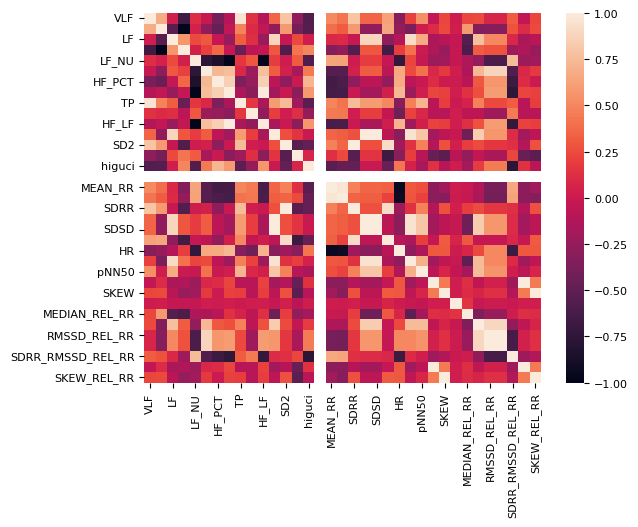

In [11]:
numeric_data = data.select_dtypes(include='number')
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=False)

In [12]:
print(data['datasetId'])
cdatasetid=0
for x in data['datasetId']:
    if(x!=2):
        cdatasetid+=1
print(cdatasetid)

0       2
1       2
2       2
3       2
4       2
       ..
4995    2
4996    2
4997    2
4998    2
4999    2
Name: datasetId, Length: 5000, dtype: int64
0


In [13]:
colnames=[]
for i in data:
    colnames.append(i)

print(colnames)
print(len(colnames))

['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']
37


Observation : Dataset does not have null values for any feature

In [14]:
new_dfd = data.drop("uuid", axis="columns")

# Replace categorical values in the "condition" column
condition_mapping = {"interruption": 0, "no stress": 1, "time pressure": 2}
new_dfd["condition"] = new_dfd["condition"].map(condition_mapping)

# Display information about the new DataFrame
print(new_dfd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                5000 non-null   float64
 1   VLF_PCT            5000 non-null   float64
 2   LF                 5000 non-null   float64
 3   LF_PCT             5000 non-null   float64
 4   LF_NU              5000 non-null   float64
 5   HF                 5000 non-null   float64
 6   HF_PCT             5000 non-null   float64
 7   HF_NU              5000 non-null   float64
 8   TP                 5000 non-null   float64
 9   LF_HF              5000 non-null   float64
 10  HF_LF              5000 non-null   float64
 11  SD1                5000 non-null   float64
 12  SD2                5000 non-null   float64
 13  sampen             5000 non-null   float64
 14  higuci             5000 non-null   float64
 15  datasetId          5000 non-null   int64  
 16  condition          5000 

In [15]:
xx=new_dfd.corr()
print(xx["HR"])

VLF                 -0.318167
VLF_PCT             -0.255635
LF                  -0.108677
LF_PCT               0.193269
LF_NU               -0.731351
HF                   0.650439
HF_PCT               0.665585
HF_NU                0.731351
TP                  -0.317456
LF_HF               -0.414726
HF_LF                0.709137
SD1                 -0.295949
SD2                 -0.209897
sampen              -0.304726
higuci               0.429574
datasetId                 NaN
condition           -0.091487
MEAN_RR             -0.943725
MEDIAN_RR           -0.927397
SDRR                -0.210253
RMSSD               -0.295959
SDSD                -0.295949
SDRR_RMSSD          -0.088706
HR                   1.000000
pNN25               -0.274146
pNN50               -0.126235
KURT                 0.297863
SKEW                 0.303769
MEAN_REL_RR          0.002380
MEDIAN_REL_RR        0.074035
SDRR_REL_RR          0.234775
RMSSD_REL_RR         0.505095
SDSD_REL_RR          0.505095
SDRR_RMSSD

In [16]:
x=new_dfd["HR"]
y1=new_dfd["MEAN_RR"]
y2=new_dfd["MEDIAN_RR"]

In [17]:
rfr_dfd=data.drop(["uuid", "datasetId"], axis=1)

# Creating a Random Forest Regressor model

In [18]:
X = rfr_dfd.drop('HR', axis=1)
y = rfr_dfd['HR']

numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=200, random_state=42))

model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}') 
print(f'R-squared: {r2}')

Mean Squared Error: 0.023615767627578974
R-squared: 0.9997867703730121


# Saving Model

In [19]:
import pickle

model_filename = "forestmodel.pkl"

with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Trained model saved as {model_filename}")


Trained model saved as forestmodel.pkl


# Testing Model

In [20]:
testdd=pd.read_csv("sample_test_data.csv")
resultdd=pd.read_csv("sample_output_generated.csv")
print(testdd.info())
print(resultdd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               10 non-null     object 
 1   VLF                10 non-null     float64
 2   VLF_PCT            10 non-null     float64
 3   LF                 10 non-null     float64
 4   LF_PCT             10 non-null     float64
 5   LF_NU              10 non-null     float64
 6   HF                 10 non-null     float64
 7   HF_PCT             10 non-null     float64
 8   HF_NU              10 non-null     float64
 9   TP                 10 non-null     float64
 10  LF_HF              10 non-null     float64
 11  HF_LF              10 non-null     float64
 12  SD1                10 non-null     float64
 13  SD2                10 non-null     float64
 14  sampen             10 non-null     float64
 15  higuci             10 non-null     float64
 16  datasetId          10 non-nul

# Making csv

In [21]:
uuidcol=testdd["uuid"]
new_data = testdd.drop(['uuid', 'datasetId'], axis=1)

new_predictions = model.predict(new_data)

result_df = pd.DataFrame({'uuid': uuidcol, 'HR': new_predictions})
result_df.to_csv('results.csv', index=False)

In [22]:
rdd=pd.read_csv("results.csv")
res=pd.read_csv("sample_output_generated.csv")
mse2=mean_squared_error(rdd['HR'],res['HR'])
print(f"MSE on test data : {mse2}")

MSE on test data : 0.02614451605667013
